<a href="https://colab.research.google.com/github/leiyi-ihb/ColabPractics/blob/main/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E5%AE%9E%E6%88%98_%E6%94%AF%E6%8C%81%E5%90%91%E9%87%8F%E6%9C%BA_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
! if [ ! -f "Social_Network_Ads.csv" ]; then wget https://raw.githubusercontent.com/MLEveryday/100-Days-Of-ML-Code/master/datasets/Social_Network_Ads.csv ; else echo "Found previous downloaded data."; fi

--2022-10-10 15:01:46--  https://raw.githubusercontent.com/MLEveryday/100-Days-Of-ML-Code/master/datasets/Social_Network_Ads.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10926 (11K) [text/plain]
Saving to: ‘Social_Network_Ads.csv’

Social_Network_Ads. 100%[===================>]  10.67K  --.-KB/s    in 0s      

2022-10-10 15:01:46 (57.8 MB/s) - ‘Social_Network_Ads.csv’ saved [10926/10926]



In [4]:
dataset = pd.read_csv('Social_Network_Ads.csv')
print(dataset)
print(type(dataset))

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>


In [5]:
X = dataset.iloc[:, [2,3]].values #https://blog.csdn.net/Fwuyi/article/details/123127754#:~:text=iloc%20%5B%5D%E5%87%BD%E6%95%B0%EF%BC%8C%E5%B1%9E%E4%BA%8E%20pandas%20%E5%BA%93%EF%BC%8C%E5%85%A8%E7%A7%B0%E4%B8%BAindex%20location%EF%BC%8C%E5%8D%B3%E5%AF%B9%E6%95%B0%E6%8D%AE%E8%BF%9B%E8%A1%8C%E4%BD%8D%E7%BD%AE%E7%B4%A2%E5%BC%95%EF%BC%8C%E4%BB%8E%E8%80%8C%E5%9C%A8%E6%95%B0%E6%8D%AE%E8%A1%A8%E4%B8%AD,%E6%8F%90%E5%8F%96%E5%87%BA%E7%9B%B8%E5%BA%94%E7%9A%84%E6%95%B0%E6%8D%AE%E3%80%82%202%20iloc%E5%87%BD%E6%95%B0%E4%BD%BF%E7%94%A8%20df.iloc%20%5Ba%2Cb%5D%EF%BC%8C%E5%85%B6%E4%B8%ADdf%E6%98%AFDataFrame%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84%E7%9A%84%E6%95%B0%E6%8D%AE%EF%BC%88%E8%A1%A81%E5%B0%B1%E6%98%AFdf%EF%BC%89%EF%BC%8Ca%E6%98%AF%E8%A1%8C%E7%B4%A2%E5%BC%95%EF%BC%88%E8%A7%81%E8%A1%A81%EF%BC%89%EF%BC%8Cb%E6%98%AF%E5%88%97%E7%B4%A2%E5%BC%95%EF%BC%88%E8%A7%81%E8%A1%A81%EF%BC%89%E3%80%82
# print(type(X))
y = dataset.iloc[:, 4].values
# y


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# print(X_train, X_test)
# print(y_train, y_test)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
# print(X_train, X_test)
# print(X_test.mean())


In [8]:
from sklearn.svm import SVC
classifer = SVC(kernel='linear', random_state=0)
classifer.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [9]:
y_pred = classifer.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1]


In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[63,  5],
       [ 7, 25]])

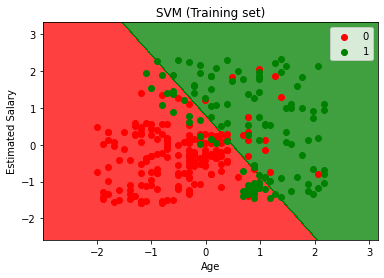

In [12]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifer.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

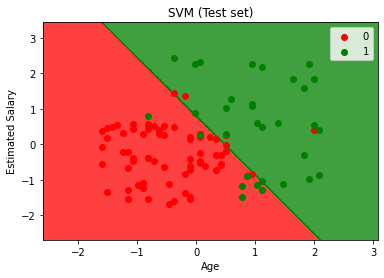

In [13]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifer.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
svm_clf = Pipeline((
    ("scaler", StandardScaler()), 
    ("linear_svc", LinearSVC(C=1, loss="hinge", dual=True)),
    )) 
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [15]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline((
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge"))
    ))

polynomial_svm_clf.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [16]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ))
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

#调参实例  
以高斯函数NuSVC进行调参示例演练，这里我选取《kaggle 泰坦尼克：从灾难中学习算法》中经过数据处理的数据集。假设 train_X 为训练特征， train_y 为训练标签，高斯核函数支持向量分类器主要需要调整的参数有两个 nu 和 gamma. 基于分类任务的评价指标指标有很多，我们这里选取 scoring='accuracy' ，有兴趣的同学也可以尝试其他的评价指标，比如 'f1' 'roc_auc' 等。

In [18]:
from sklearn.svm import NuSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [24]:
nu_list = np.linspace(0.1, 0.7, 7)
accuracy_scroes = []
for nu in nu_list:
  musc = NuSVC(nu=nu)
  scores_accuracy = cross_val_score(musc, X_train, y_train, scoring='accuracy', cv=5)
  accuracy_scroes.append(scores_accuracy.mean())
print(accuracy_scroes)

[0.4833333333333334, 0.57, 0.6266666666666667, 0.6033333333333333, 0.7733333333333334, 0.76, 0.76]


Text(0.5, 1.0, 'nu for accuracy_scroes')

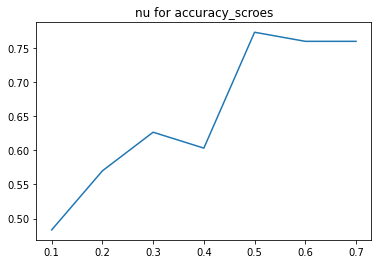

In [25]:
plt.plot(nu_list, accuracy_scroes)
plt.title("nu for accuracy_scroes")

由上结果可知，最佳nu值出现在`0.5`左右，所以网格搜索我们设定nu的取值范围在`[0.4, 0.6]`之间  
# **搜索gamma的最优取值范围**

In [26]:
gamma_list = np.linspace(0.01, 1, 91)
accuracy_scroes = []
for gamma in gamma_list:
  nsvc = NuSVC(gamma=gamma, nu=0.5)
  scores_accuracy = cross_val_score(nsvc, X_train, y_train, scoring='accuracy', cv=5)
  accuracy_scroes.append(scores_accuracy)
print(accuracy_scroes)

[array([0.61666667, 0.71666667, 0.65      , 0.7       , 0.75      ]), array([0.63333333, 0.7       , 0.66666667, 0.7       , 0.73333333]), array([0.61666667, 0.65      , 0.63333333, 0.68333333, 0.66666667]), array([0.63333333, 0.65      , 0.61666667, 0.68333333, 0.66666667]), array([0.63333333, 0.65      , 0.61666667, 0.68333333, 0.66666667]), array([0.63333333, 0.63333333, 0.61666667, 0.68333333, 0.66666667]), array([0.65      , 0.63333333, 0.61666667, 0.68333333, 0.66666667]), array([0.65      , 0.63333333, 0.61666667, 0.66666667, 0.68333333]), array([0.65      , 0.63333333, 0.61666667, 0.66666667, 0.68333333]), array([0.65      , 0.63333333, 0.61666667, 0.66666667, 0.68333333]), array([0.66666667, 0.63333333, 0.61666667, 0.66666667, 0.68333333]), array([0.66666667, 0.63333333, 0.61666667, 0.66666667, 0.68333333]), array([0.66666667, 0.63333333, 0.61666667, 0.66666667, 0.68333333]), array([0.66666667, 0.63333333, 0.61666667, 0.66666667, 0.68333333]), array([0.66666667, 0.63333333, 0.

Text(0.5, 1.0, 'gamma for accuracy_scores')

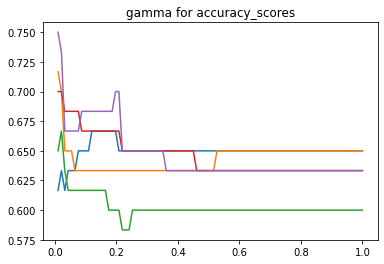

In [27]:
plt.plot(gamma_list, accuracy_scroes)
plt.title('gamma for accuracy_scores')

由上结果就可以知道`gamma`值的最优结果在`0.02`左右，所以网格搜索设定ganmma的取值范围在`(0, 0.2]`之间  
# 网格搜索

In [31]:
import numpy as np
from joblib.logger import PrintTime
param_grid = {'nu': np.linspace(0.3, 0.6, 31), 'gamma': np.linspace(0.01, 0.2, 191)}
gsearch = GridSearchCV(NuSVC(), param_grid=param_grid, scoring='accuracy', cv=5)
gsearch.fit(X_train, y_train)
print(gsearch.best_params_)
print(gsearch.best_score_)

{'gamma': 0.015, 'nu': 0.5700000000000001}
0.6966666666666667


输出结果为  
`{'gamma': 0.015, 'nu': 0.5700000000000001}

0.6966666666666667`  
所以`gamma=0.015 nu=0.57`即为最优参数